# Compare models
This notebook compares the Doyle-Fuller-Newman (DFN), the Single Particle Model with electrolyte dynamics (SPMe) and the Single Particle Model (SPM) and generates Figures 8 and 9 of the article.

If this notebook is running on Google Colab, we first need to install PyBaMM (you can skip if not using Google Colab).

In [1]:
%pip install pybamm -q

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
You should consider upgrading via the '/home/ferranbrosa/continuum-model-review/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


We start by importing the relevant packages.

In [2]:
import pybamm
import matplotlib.pyplot as plt

Next we need to choose which models we want to simulate. In this case we want to simulate various models so we define them in a list.

In [3]:
models = [
    pybamm.lithium_ion.SPM(name="SPM"),
    pybamm.lithium_ion.SPMe(name="SPMe"),
    pybamm.lithium_ion.DFN(name="DFN"),
]

We also need to define the parameter values we want to use. In this case we choose the parameter values for [Chen et al (2020)](https://iopscience.iop.org/article/10.1149/1945-7111/ab9050).

In [4]:
param = pybamm.ParameterValues(chemistry="Chen2020")

Now we can assemble and solve each model for a 2C discharge. The solved models are stored in `sims` as a list.

In [5]:
sims = []
C_rate = 2
t_end = 1e10
for model in models:
    sim = pybamm.Simulation(model, parameter_values=param, C_rate=C_rate)
    sim.solve([0, 3700 / C_rate])
    sims.append(sim)
    t_end = min(t_end, sim.solution["Time [s]"].entries[-1])

Finally we can just plot the solutions for the various models together. Note that this is the interactive version of Figure 8, so you can manipulate the slider to change the time.

In [6]:
plot = pybamm.QuickPlot(
    sims,
    output_variables=[
        "Negative particle surface concentration [mol.m-3]",
        "Electrolyte concentration [mol.m-3]",
        "Positive particle surface concentration [mol.m-3]",
        "Negative electrode potential [V]",
        "Electrolyte potential [V]",
        "Positive electrode potential [V]",
        "Current [A]",
        "Discharge capacity [A.h]",
        "Terminal voltage [V]",
    ],
    time_unit="seconds",
    figsize=(12, 12))
plot.dynamic_plot()

# Uncomment to plot at the end of discharge and save the figure
# plot.plot(t_end)
# plot.fig.savefig("img/compare_models_internal_states.png", dpi=300)
# plot.fig.savefig("img/compare_models_internal_states.eps", format="eps")

interactive(children=(FloatSlider(value=0.0, description='t', max=1735.990656976498, step=17.35990656976498), …

We finish by producing the voltage contributions plots for each model (Figure 9).

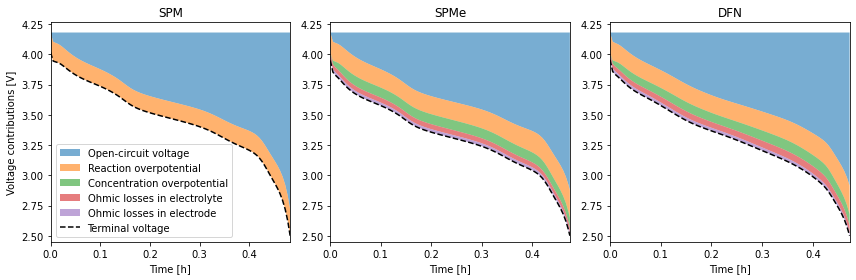

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
show_legend = False
for ax, sim in zip(axs, sims):
    pybamm.plot_voltage_components(sim.solution, show_legend=show_legend, ax=ax)
    show_legend = False
    ax.set_title(sim.model.name)

axs[0].set_ylabel("Voltage contributions [V]")
labels = [
    "Open-circuit voltage",
    "Reaction overpotential",
    "Concentration overpotential",
    "Ohmic losses in electrolyte",
    "Ohmic losses in electrode",
    "Terminal voltage",
]
leg = axs[0].legend(labels, loc="lower left", frameon=True)
fig.tight_layout()

# Uncomment to save the figure
# fig.savefig("img/compare_models_voltage.png", dpi=300)
# fig.savefig("img/compare_models_voltage.eps", format="eps")

Note that PyBaMM includes a `print_citations()` command that shows you all the papers that have contribute to a particular script. For this particular example, the relevant papers are:

In [8]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Chang-Hui Chen, Ferran Brosa Planella, Kieran O'Regan, Dominika Gastol, W. Dhammika Widanage, and Emma Kendrick. Development of Experimental Techniques for Parameterization of Multi-scale Lithium-ion Battery Models. Journal of The Electrochemical Society, 167(8):080534, 2020. doi:10.1149/1945-7111/ab9050.
[3] Marc Doyle, Thomas F. Fuller, and John Newman. Modeling of galvanostatic charge and discharge of the lithium/polymer/insertion cell. Journal of the Electrochemical society, 140(6):1526–1533, 1993. doi:10.1149/1.2221597.
[4] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with